C:\Users\kamal\AppData\Local\Temp\ipykernel_12268\3484435708.py:24: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])


Mean Squared Error: 3243.13


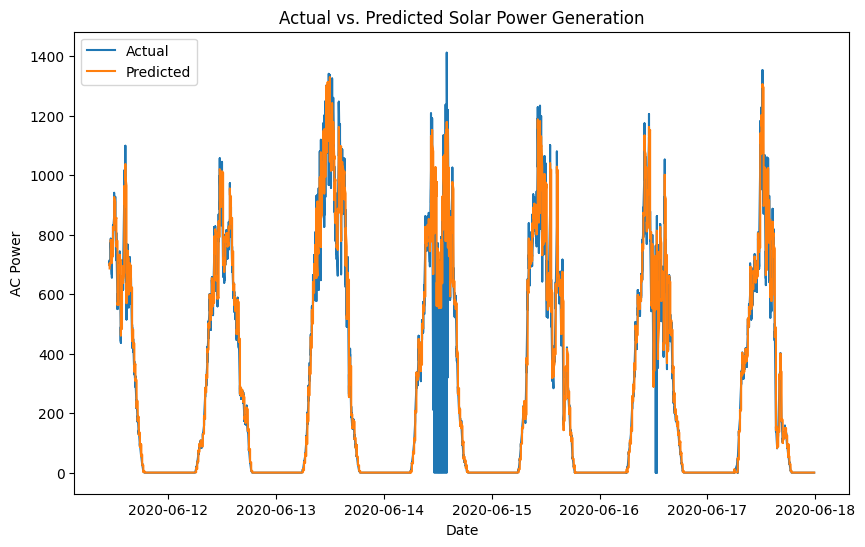

In [4]:
#!/usr/bin/env python
# coding: utf-8


#project1
#Renewable Energy Forecasting and Optimization:
#Develop an AI-powered system that forecasts renewable energy generation (solar)based on historical data and weather patterns.
#The system should also optimize energy storage and distribution to ensure efficient utilization of generated energy



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('C:/Users/kamal/OneDrive/Desktop/Hackathon/Datasets/Plant_1_Generation_Data.csv')

# Convert the DATE_TIME column to datetime type
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# Set the DATE_TIME column as the index
data.set_index('DATE_TIME', inplace=True)

# Feature Engineering
#Feature engineering is the process of transforming raw data into features that are suitable for machine learning models
data['hour'] = data.index.hour
data['day'] = data.index.dayofyear
data['day_of_week'] = data.index.dayofweek
data['quarter'] = data.index.quarter
data['month'] = data.index.month

for i in range(1, 6):
    data[f'lag_{i}'] = data['AC_POWER'].shift(i)

# Train-Test Split
target = 'AC_POWER'
features = ['hour', 'day', 'day_of_week', 'quarter', 'month', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
train_data_imputed = imputer.fit_transform(train_data[features])
test_data_imputed = imputer.transform(test_data[features])

# Initialize the model
model = HistGradientBoostingRegressor(random_state=42)

# Fit the model
model.fit(train_data_imputed, train_data[target])

# Make predictions on test data
predictions = model.predict(test_data_imputed)

# Calculate Mean Squared Error 
#In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator 
#(of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, 
#the average squared difference between the estimated values and the actual value
mse = mean_squared_error(test_data[target], predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[target], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('AC Power')
plt.title('Actual vs. Predicted Renewable Power Generation')
plt.legend()
plt.show()


# In[ ]:




